In [2]:
from PIL import Image
import numpy as np

In [3]:
image = Image.open('house.jpeg')
image = np.asarray(image)

image = np.moveaxis(image, -1, 0)
print(image.shape)

(3, 667, 1000)


In [4]:
stride = 1
kernel = np.random.randn(image.shape[0], 5, 5)

kernel_list = np.array([
  [
    [
      [-1,  0,  1],
      [-2,  0,  2],
      [-1,  0,  1],
    ],
    [
      [-1,  0,  1],
      [-2,  0,  2],
      [-1,  0,  1],
    ],
    [
      [-1,  0,  1],
      [-2,  0,  2],
      [-1,  0,  1],
    ],
  ],
  [
    [
      [ 1,  2,  1],
      [ 0,  0,  0],
      [-1, -2, -1],  
    ],
    [
      [ 1,  2,  1],
      [ 0,  0,  0],
      [-1, -2, -1],  
    ],
    [
      [ 1,  2,  1],
      [ 0,  0,  0],
      [-1, -2, -1],  
    ],

  ],
])

kernel = kernel_list[0]

convolved_image_list = np.array([np.zeros((int((image.shape[1] - kernel.shape[1])/stride) + 1, int((image.shape[2] - kernel.shape[2])/stride) + 1))] * 2)
print(convolved_image_list.shape)

(2, 665, 998)


In [5]:
print(image[:, 0: 0+kernel.shape[1], 0: 0 + kernel.shape[2]].shape)
print(kernel.shape)

(3, 3, 3)
(3, 3, 3)


In [6]:
count = 0
for kernel in kernel_list:
  convolved_image = np.zeros((int((image.shape[1] - kernel.shape[1])/stride) + 1, int((image.shape[2] - kernel.shape[2])/stride) + 1))
  for i in range(0,image.shape[1] - kernel.shape[1] + 1, stride):
    for j in range(0, image.shape[2] - kernel.shape[2] + 1, stride):
      convolved_image[i, j] = (np.sum(np.multiply(image[:, i:i+kernel.shape[1], j: j+kernel.shape[2]], kernel)))
  convolved_image_list[count] = convolved_image
  count += 1

In [7]:
final_image = np.sqrt(np.sum(np.square(convolved_image_list), axis = 0))
print(final_image.shape)

(665, 998)


(665, 998)


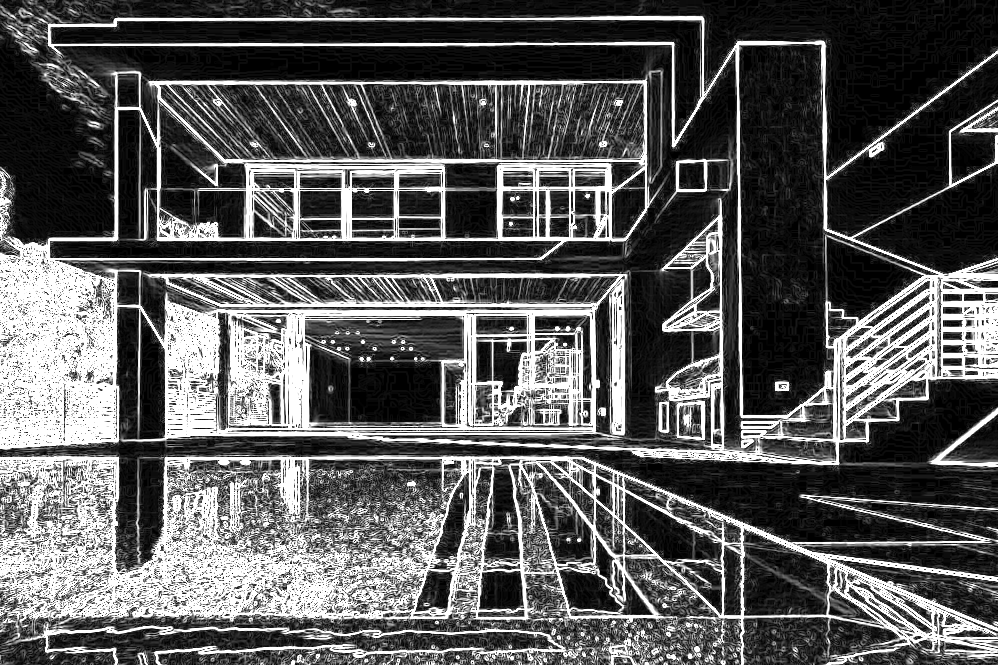

In [9]:
print(final_image.shape)
c_im = Image.fromarray(final_image)
if c_im.mode != 'RGB':
  c_im = c_im.convert('RGB')


display(c_im)